In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# panda config 
pd.set_option('display.width', 2000)

In [7]:
df = pd.read_csv('../data/raw/data.csv')

print(df.shape)
print(df.head())

(95662, 16)
         TransactionId         BatchId       AccountId       SubscriptionId       CustomerId CurrencyCode  CountryCode    ProviderId     ProductId     ProductCategory    ChannelId   Amount  Value  TransactionStartTime  PricingStrategy  FraudResult
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10             airtime  ChannelId_3   1000.0   1000  2018-11-15T02:18:49Z                2            0
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6  financial_services  ChannelId_2    -20.0     20  2018-11-15T02:19:08Z                2            0
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1             airtime  ChannelId_3    500.0    500  2018-11-15T02:44:21Z                2          

In [8]:
# types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [12]:
# unique values in each column
df.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64

In [16]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [23]:
print(df['FraudResult'].value_counts())
print(df['PricingStrategy'].value_counts())
print(df['ProductCategory'].value_counts())
print(df['CurrencyCode'].value_counts())
print(df['CountryCode'].value_counts())


FraudResult
0    95469
1      193
Name: count, dtype: int64
PricingStrategy
2    79848
4    13562
1     1867
0      385
Name: count, dtype: int64
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64
CurrencyCode
UGX    95662
Name: count, dtype: int64
CountryCode
256    95662
Name: count, dtype: int64


In [ ]:
# check for missing values
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [26]:
amount_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Skewness', 'Kurtosis'],
    'Amount': [df['Amount'].mean(), df['Amount'].median(), df['Amount'].std(),
               df['Amount'].min(), df['Amount'].max(),
               df['Amount'].skew(), df['Amount'].kurt()],
    'Value': [df['Value'].mean(), df['Value'].median(), df['Value'].std(),
              df['Value'].min(), df['Value'].max(),
              df['Value'].skew(), df['Value'].kurt()]
})

print(amount_stats)

  Statistic        Amount         Value
0      Mean  6.717846e+03  9.900584e+03
1    Median  1.000000e+03  1.000000e+03
2   Std Dev  1.233068e+05  1.231221e+05
3       Min -1.000000e+06  2.000000e+00
4       Max  9.880000e+06  9.880000e+06
5  Skewness  5.109849e+01  5.129109e+01
6  Kurtosis  3.363128e+03  3.378069e+03


In [29]:
# Frequency tables for key categorical variables
cat_cols = ['ProductCategory', 'ChannelId', 'PricingStrategy']
for col in cat_cols:
    print(f"\nFrequency table for {col}:")
    freq = df[col].value_counts(normalize=True) * 100
    display(pd.DataFrame({'Count': df[col].value_counts(), 'Percentage (%)': freq}))


Frequency table for ProductCategory:


,Count,Percentage (%)
ProductCategory,,
financial_services,45405,47.463988
airtime,45027,47.068847
utility_bill,1920,2.007067
data_bundles,1613,1.686145
tv,1279,1.336999
ticket,216,0.225795
movies,175,0.182936
transport,25,0.026134
other,2,0.002091



Frequency table for ChannelId:


,Count,Percentage (%)
ChannelId,,
ChannelId_3,56935,59.516841
ChannelId_2,37141,38.825239
ChannelId_5,1048,1.095524
ChannelId_1,538,0.562397



Frequency table for PricingStrategy:


,Count,Percentage (%)
PricingStrategy,,
2,79848,83.468880
4,13562,14.176998
1,1867,1.951663
0,385,0.402459


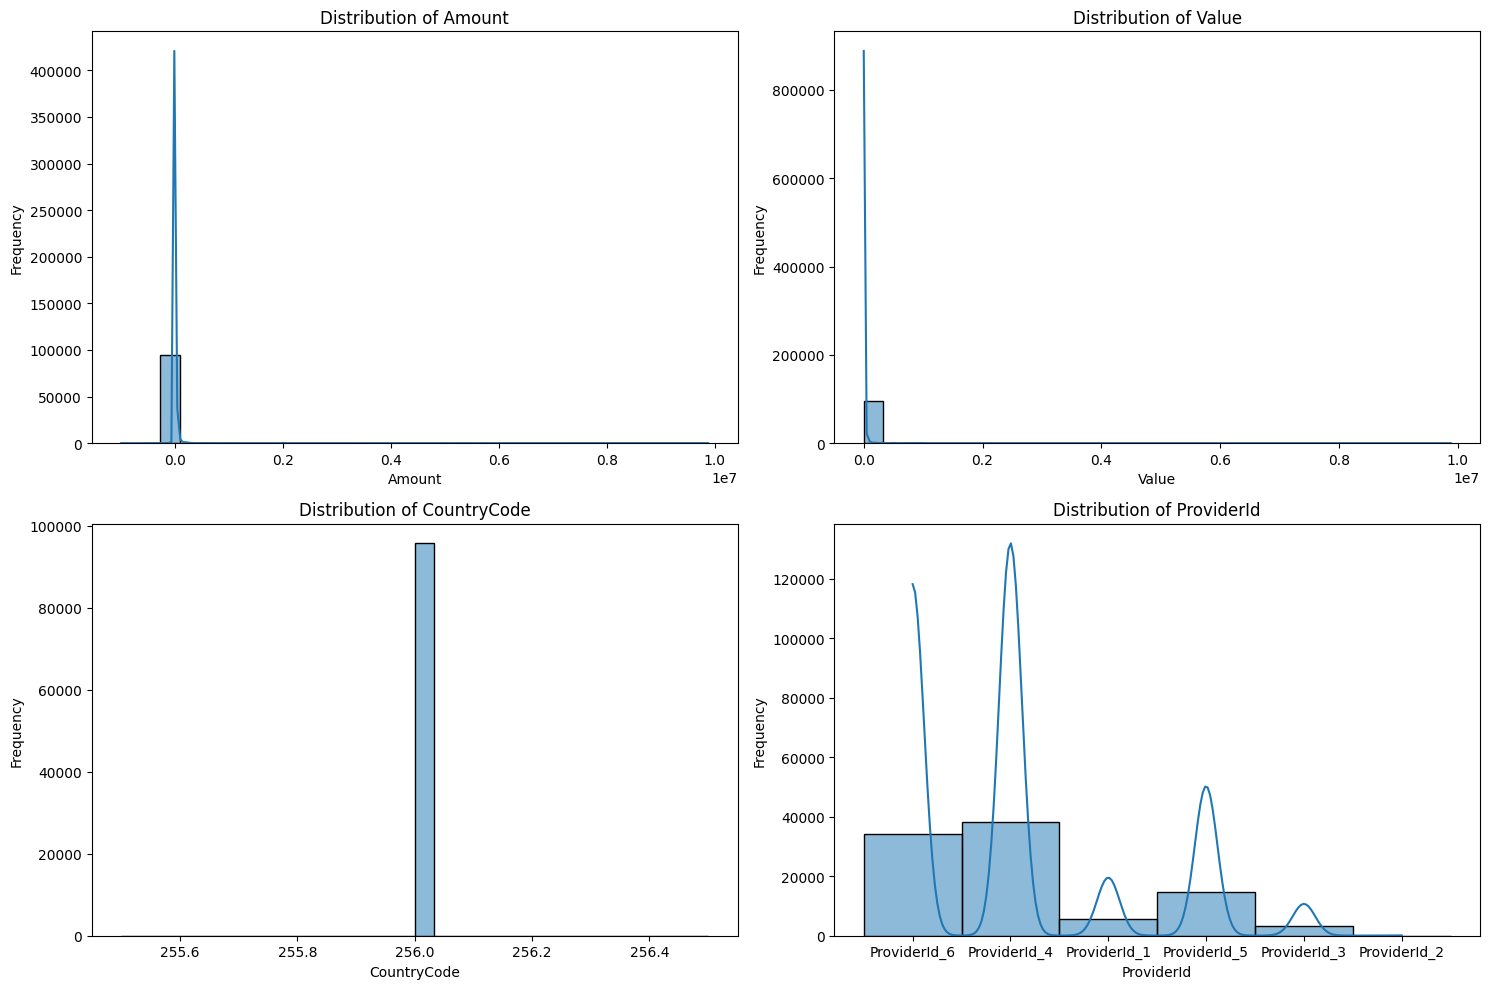

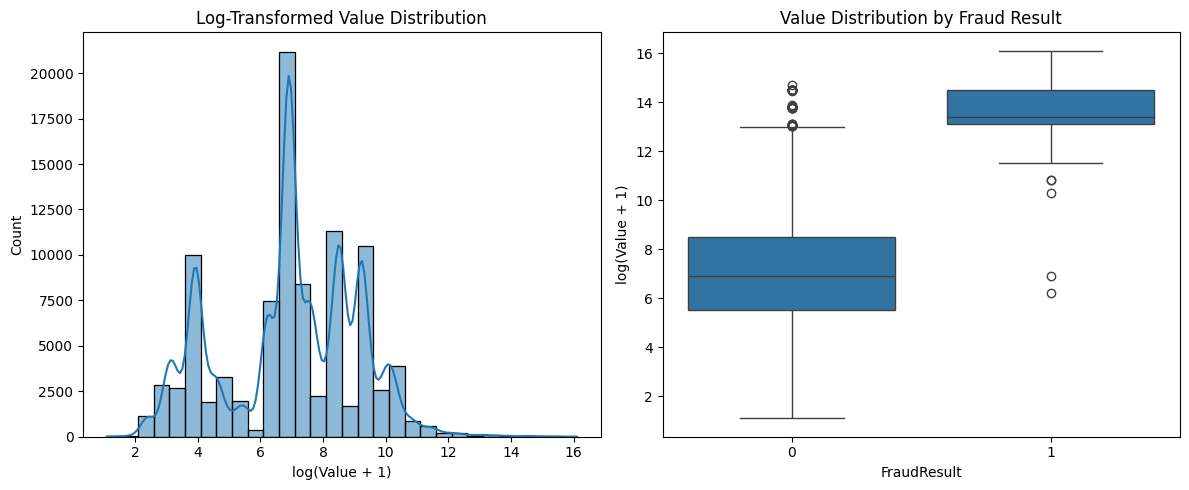

In [30]:
# Select numerical columns for visualization
num_cols = ['Amount', 'Value', 'CountryCode', 'ProviderId']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Log transformation for highly skewed variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df['Value']), kde=True, bins=30)
plt.title('Log-Transformed Value Distribution')
plt.xlabel('log(Value + 1)')

plt.subplot(1, 2, 2)
sns.boxplot(x='FraudResult', y=np.log1p(df['Value']), data=df)
plt.title('Value Distribution by Fraud Result')
plt.ylabel('log(Value + 1)')
plt.tight_layout()
plt.show()